# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](https://media.istockphoto.com/id/1466632540/pt/foto/man-with-short-brown-hair-and-a-black-vest-is-walking-on-his-agricultural-field-in-the-evening.jpg?s=612x612&w=0&k=20&c=gq-a_novFm6pGj-UaB9jAxCYrZmISFxIFobnVxL8Jfs=)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [1]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
CSV_PATH = './data/raw/soil_measures.csv'

crops = pd.read_csv(CSV_PATH)

crops.head()

# Write your code here

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


## Tasks

Build a multi-class Logistic Regression model to predict categories of "`crop`" with a F1 score of more than 0.5.

### First

* Read in `soil_measures.csv` as a pandas DataFrame and perform some data checks, such as determining the number of crops, checking for missing values, and verifying that the data in each potential feature column is numeric.

In [2]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [3]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [9]:
crops.duplicated().sum()

0

### Second

* Split the data into training and test sets, setting test_size equal to 20% and using a `random_state` of `42`.

In [10]:
X, y = crops.drop('crop', axis=True), crops['crop']

print(X.head())
print(y.head())

    N   P   K        ph
0  90  42  43  6.502985
1  85  58  41  7.038096
2  60  55  44  7.840207
3  74  35  40  6.980401
4  78  42  42  7.628473
0    rice
1    rice
2    rice
3    rice
4    rice
Name: crop, dtype: object


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=42)

### Third

* Predict the "`crop`" type using each feature individually by looping over all the features, and, for each feature, fit a Logistic Regression model and calculate `f1_score()`. When creating the model, set `max_iter` to `2000` so the model can converge, and pass an appropriate string value to the `multi_class` keyword argument.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

f1_scores = []

for feature in X.columns:
    model = LogisticRegression(max_iter=2000,
                               multi_class='multinomial',
                               random_state=42)

    model.fit(X_train[[feature]], y_train)

    y_hat = model.predict(X_test[[feature]])
    
    f1_scores.append((feature, f1_score(y_test, y_hat, average='weighted')))

    print(f'Model trained with {feature} feature: {f1_scores[-1][1]:.2f}')

Model trained with N feature: 0.11
Model trained with P feature: 0.13
Model trained with K feature: 0.24
Model trained with ph feature: 0.05


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Fourth

* In order to avoid selecting two features that are highly correlated, perform a correlation analysis for each pair of features, enabling you to build a final model without the presence of multicollinearity.

<Axes: >

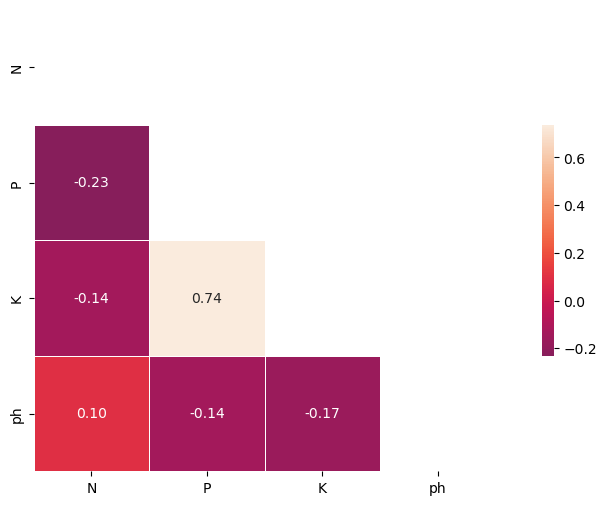

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

corr = X.corr()

fig, ax = plt.subplots(figsize=(12, 6))

sns.heatmap(data=corr,
             mask=np.triu(np.ones_like(corr, dtype=bool)),
             center=0,
             square=True,
             linewidth=.5,
             cbar_kws={'shrink': .5},
             annot=True,
             fmt='.2f',
             cmap='rocket')

> Feature `P` seems to have a high value and should be removed from next model train

### Fifth

* Once you have your final features, train and test a new Logistic Regression model called `log_reg`, then evaluate performance using `f1_score()`, saving the metric as a variable called `model_performance`.

In [37]:
final_features = crops.drop(['P', 'crop'], axis=1).columns

X, y = crops[final_features], crops['crop']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=42)

In [42]:
log_reg = LogisticRegression(max_iter=2000,
                             multi_class='multinomial',
                             random_state=42)

log_reg.fit(X_train, y_train)

y_hat = log_reg.predict(X_test)

model_performance = f1_score(y_test, y_hat, average='weighted')

print(f'Final model F1 score: {model_performance:.2f}')

Final model F1 score: 0.56


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
